In [1]:
import numpy as np
import pandas as pd
from nn_utils import *


## Data Processing

### Applying One-Hot Encoding to Training Set

In [2]:
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

In [3]:
tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
tr_data.head()
tr_data = tr_data.sample(frac=1)
tr_data.reset_index(drop=True, inplace=True)
tr_data_Y = tr_data[["Class"]]
tr_id_dummies = pd.get_dummies(tr_data["ID"], dtype=int, drop_first = True)

tr_data_X = pd.concat([tr_data.drop(["Class", "ID"], axis = 1), tr_id_dummies], axis = 1)
tr_data_X.insert(tr_data_X.shape[0], "unknown", 0)
print(tr_data_X)

     a1  a2  a3  a4  a5  a6  data_107  data_111  data_114  data_116  ...  \
0     2   2   2   1   1   1         0         0         0         0  ...   
1     1   3   2   3   1   1         0         0         0         0  ...   
2     3   2   2   1   3   2         0         0         0         0  ...   
3     2   2   1   1   2   1         0         0         0         0  ...   
4     1   2   1   1   2   1         0         0         0         0  ...   
..   ..  ..  ..  ..  ..  ..       ...       ...       ...       ...  ...   
119   3   3   2   3   1   2         0         0         0         0  ...   
120   1   2   2   3   3   1         0         0         0         0  ...   
121   1   2   2   1   2   2         0         0         0         0  ...   
122   2   3   1   3   1   2         0         0         0         0  ...   
123   1   2   1   2   3   2         0         0         0         0  ...   

     data_72  data_76  data_86  data_87  unknown  data_88  data_92  data_93  \
0       

### Applying One-Hot Encoding to Test Set

In [4]:
test_data = pd.read_csv("../monk+s+problems/monks-1.test", sep =" ",  names = col_names)
test_data.head()
test_data.reset_index(drop = True, inplace = True)
test_data = test_data.sample(frac=1)
test_data_Y = test_data[["Class"]]
test_id_dummies = pd.get_dummies(test_data["ID"], dtype=int, drop_first = True)

test_data_X = pd.concat([test_data.drop(["Class", "ID"], axis = 1), test_id_dummies], axis = 1)
test_data_X.insert(len(test_data_X.columns), "unknown", 0)

common_cols = list(set(tr_data_X.columns).intersection(test_data_X.columns))

print(test_data_X)

     a1  a2  a3  a4  a5  a6  data_10  data_100  data_101  data_102  ...  \
138   1   3   2   3   2   1        0         0         0         0  ...   
154   2   1   1   2   2   1        0         0         0         0  ...   
10    1   1   1   2   2   1        0         0         0         0  ...   
27    1   1   2   1   2   2        0         0         0         0  ...   
89    1   2   2   3   1   2        0         0         0         0  ...   
..   ..  ..  ..  ..  ..  ..      ...       ...       ...       ...  ...   
248   2   3   1   2   1   1        0         0         0         0  ...   
48    1   2   1   1   1   1        0         0         0         0  ...   
189   2   1   2   3   3   2        0         0         0         0  ...   
286   2   3   2   3   4   1        0         0         0         0  ...   
290   3   1   1   1   2   1        0         0         0         0  ...   

     data_91  data_92  data_93  data_94  data_95  data_96  data_97  data_98  \
138        0        

### Processing Test Set for One-Hot Encoding

In [5]:
for col in test_data_X.columns: 
    if col not in common_cols: #IF IT'S AN UNSEEN CLASS WE SET "UNKNOWN" TO 1 AND REMOVE THE COLUMN
        row = test_data_X.loc[test_data_X[col] == 1].index[0] 
        test_data_X.at[row,"unknown"] = 1
        test_data_X.drop(col, axis = 1, inplace = True)
print (test_data_X)

     a1  a2  a3  a4  a5  a6  data_107  data_111  data_114  data_116  ...  \
138   1   3   2   3   2   1         0         0         0         0  ...   
154   2   1   1   2   2   1         0         0         0         0  ...   
10    1   1   1   2   2   1         0         0         0         0  ...   
27    1   1   2   1   2   2         0         0         0         0  ...   
89    1   2   2   3   1   2         0         0         0         0  ...   
..   ..  ..  ..  ..  ..  ..       ...       ...       ...       ...  ...   
248   2   3   1   2   1   1         0         0         0         0  ...   
48    1   2   1   1   1   1         0         0         0         0  ...   
189   2   1   2   3   3   2         0         0         0         0  ...   
286   2   3   2   3   4   1         0         0         0         0  ...   
290   3   1   1   1   2   1         0         0         0         0  ...   

     data_72  data_76  data_86  data_87  data_88  data_92  data_93  data_94  \
138     

### Testing that the numbers are correct

In [6]:
n_unknowns = test_data_X.unknown.value_counts()[1] 
print(n_unknowns)

n_knowns = tr_data_X.shape[0]
print(n_knowns)

print(n_knowns + n_unknowns == test_data_X.shape[0]) # NUMBER OF KNOWN EXAMPLES (TR.SET) + NUMBER OF UNKNOWN EXAMPLES IN TEST SET GIVES US TEST SET TOT. EXAMPLES


308
124
True


## Creating the Neural Network

In [7]:
tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
tr_data.head()
tr_data = tr_data.sample(frac=1)
tr_data.reset_index(drop=True, inplace=True)
net = NeuralNetwork()

net.add_input_layer(tr_data.shape[1] - 2)

net.add_hidden_layer(net.input_layer.n_neurons, 4)

net.add_output_layer(4, 1)

## Training

### Training with Mean Square Error

Epoch = 1, step = 1 total Error post-training = 0.12745857212446035
Epoch = 1, step = 2 total Error post-training = 0.11479478010252063
Epoch = 1, step = 3 total Error post-training = 0.10979559371544986
Epoch = 1, step = 4 total Error post-training = 0.14511369461043092
Epoch = 1, step = 5 total Error post-training = 0.13066736576308022
Epoch = 1, step = 6 total Error post-training = 0.14847529287908082
Epoch = 1, step = 7 total Error post-training = 0.10615312182009042
Epoch = 1, step = 8 total Error post-training = 0.1052592674235782
Epoch = 2, step = 1 total Error post-training = 0.10578648536933852
Epoch = 2, step = 2 total Error post-training = 0.08248594351789232
Epoch = 2, step = 3 total Error post-training = 0.10631604209812882
Epoch = 2, step = 4 total Error post-training = 0.1215629289267271
Epoch = 2, step = 5 total Error post-training = 0.11160222121360594
Epoch = 2, step = 6 total Error post-training = 0.08079572648220011
Epoch = 2, step = 7 total Error post-training = 0.

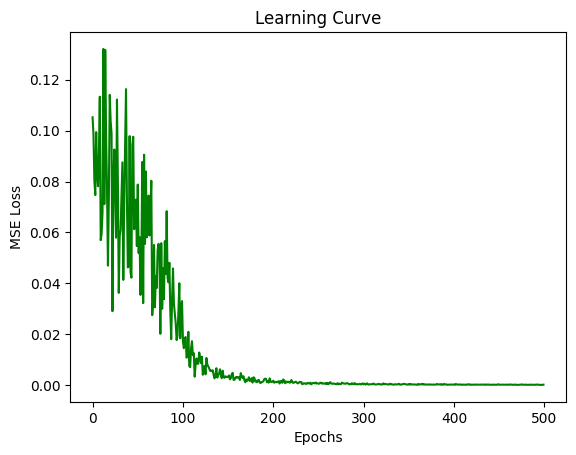

In [8]:

losses = net.train(tr_data, epochs=500,
                   eta=0.1, clip_value=None, hid_act_fun="tanh", out_act_fun="sigmoid", cost_fun="mse")  # TANH IS FASTER?? SCRITTO SULLE SLIDE
# print(net)
# print(net.input_layer.weights)

plot_loss(losses, cost_fun="mse")

### Training with Binary Cross Entropy

In [9]:
'''
#RESET THE NETWORK!!!

losses = net.train(tr_data_X, tr_data_Y, epochs=1000,
                   eta=0.5, clip_value=None, hid_act_fun="tanh", out_act_fun="sigmoid", cost_fun="b_ce")  # TANH IS FASTER?? SCRITTO SULLE SLIDE
# print(net)
# print(net.input_layer.weights)

plot_loss(losses, cost_fun="b_ce")
'''

'\n#RESET THE NETWORK!!!\n\nlosses = net.train(tr_data_X, tr_data_Y, epochs=1000,\n                   eta=0.5, clip_value=None, hid_act_fun="tanh", out_act_fun="sigmoid", cost_fun="b_ce")  # TANH IS FASTER?? SCRITTO SULLE SLIDE\n# print(net)\n# print(net.input_layer.weights)\n\nplot_loss(losses, cost_fun="b_ce")\n'

In [10]:
def test(self, data: pd.DataFrame, labels: pd.DataFrame, hid_act_fun, out_act_fun, cost_fun):
    return self.calcError(data, labels, hid_act_fun, out_act_fun, cost_fun)

valid_X = tr_data_X.head(30)
valid_Y = tr_data_Y.head(30)
test_err = net.calcError(valid_X, valid_Y, "tanh", "sigmoid", "mse")
print(test_err)

ValueError: shapes (130,) and (6,4) not aligned: 130 (dim 0) != 6 (dim 0)